# Exercise 01 - Tensors

In Chapter 1 of the lecture, we recapitulated tensor notation and tensor analysis. In this exercise, we will learn how to code these operations with torch in Python.


## Task 1 - Installation and Python Basics

There are many ways to install Python and many editors to write Python code. If you have already a version of Python or Anaconda installed, you can keep that version. However, if you are installing Python for the first time, I recommend the following procedure:

### Install a minimal Python
- Go to https://github.com/conda-forge/miniforge and download installer of "Miniforge 3" for your operating system
- Start the installer
- Install for "Just Me" and add to PATH variable

### Install Visual Studio Code as your code editor
- Go to https://code.visualstudio.com and download installer of "Visual Studio Code" for your operating system 
- Start the installer
- Install using your personal preferences (desktop icon etc.)
- Customize to your liking

### Install required packages
To solve the tasks with code, we will use a package called torch-fem. It is a differentiable finite element solver based on the PyTorch framework. PyTorch is a powerful Python package to operate on tensors. In comparison to NumPy, it stores gradients together with tensors and thus allows automatic differentiation. The package is used widely for machine learning and optimization. 

For installation it is best to create a new conda environment via
```bash
    conda create -n "struct_opt" python
```
and activate that environment via
```bash
    conda activate struct_opt
``` 
to have a fresh new independent virtual Python environment to install the required packages with this course. It is highly recommended to use such an environment to prevent potential conflicts with other Python projects.

In the activated environment, you should install the package torch-fem
```bash
    pip install torch-fem
```
to install the required packages. After that, you should be able to import the torch package in this Jupyter Notebook:

In [1]:
import matplotlib.pyplot as plt
import torch
from torchfem.utils import plot_contours

torch.set_default_dtype(torch.double)

a) Define the variables $a=2.0$ and $b=3.0$.

In [2]:
a = 2.0
b = 3.0

b) Compute the sum $c=a+b$ and print the result using the built-in `print()` function.

In [3]:
c = a + b
print(c)

5.0


c) Use an f-string to print a formatted statement as "The sum of a=< a > and b=< b > is < c >."

In [4]:
print(f"The sum of {a} and {b} is {c}.")

The sum of 2.0 and 3.0 is 5.0.


d) Here is a function `multiply(x,y)`. Call it with variables $a$ and $b$ and assign the result to a variable $d$. Print $d$.

In [5]:
def multiply(x, y):
    return x * y


d = multiply(a, b)
print(d)

6.0


e) Write a function that divides two numbers and adds a third number to the result. Test it by computing $e$ with inputs $a$, $b$, $4.0$. Print $e$.

In [6]:
def divide_and_add(x, y, z):
    return (x / y) + z


e = divide_and_add(a, b, 4.0)
print(e)

4.666666666666667


f) You get a list of integers called `numbers`. Iterate over the items in the list with a `for` loop and print for each item wether it is odd or even. 

**Hint:** The modulo operator `i%j` returns the remainder of the division $i/j$. 

In [7]:
numbers = [33, 43, 9, 7, 38, 25, 17, 19, 29]

for number in numbers:
    if number % 2 == 0:
        print(f"{number} is even.")
    else:
        print(f"{number} is odd.")

33 is odd.
43 is odd.
9 is odd.
7 is odd.
38 is even.
25 is odd.
17 is odd.
19 is odd.
29 is odd.


g) Implement a function that takes a list as argument and finds the maximum value in that list. It should return the maximum value and the location of the maximum in the list.

In [8]:
def find_max(input):
    max_val = -1
    max_idx = -1
    for i, val in enumerate(input):
        if val > max_val:
            max_val = val
            max_idx = i
    return [max_val, max_idx]


value, position = find_max(numbers)
print(f"Resulting value: {value}, resulting position: {position}")

Resulting value: 43, resulting position: 1


## Task 2: Vectors and vector products in torch

Two vectors $\mathbf{x}, \mathbf{y} \in \mathcal{R}^3$ are given by their components
$$
x_i = \begin{pmatrix}2\\1\\3\end{pmatrix} \quad y_i = \begin{pmatrix}5\\0\\1\end{pmatrix}
$$

a) Define the vectors in torch using `torch.tensor(data)`. The `data` is an array-like object, e.g. a list or tuple.

In [9]:
x = torch.tensor([2.0, 1.0, 3.0])
y = torch.tensor([5.0, 0.0, 1.0])

b) Compute the inner product (=scalar product, dot product) between those two tensors using `torch.inner(x,y)` and print the result

In [10]:
x_dot_y = torch.inner(x, y)
print(x_dot_y)

tensor(13.)


In [11]:
x_outer_y = torch.outer(x, y)
print(x_outer_y)

tensor([[10.,  0.,  2.],
        [ 5.,  0.,  1.],
        [15.,  0.,  3.]])


## Task 3 - Tensors and tensor products in torch 

Given are the tensors $\mathbf{n} \in \mathcal{R}^{3}$, $\mathbf{E} \in \mathcal{R}^{3 \times 3}$, and $\mathbb{C} \in \mathcal{R}^{3 \times 3 \times 3 \times 3}$ by their components 
$$
n_i =
\begin{pmatrix}1.0\\0.0\\0.0\end{pmatrix}
$$
$$
\pmb{\varepsilon}_{ij} =
\begin{pmatrix}
    5.0 & 0.1 & 0.0\\
    0.1 & 2.0 & 0.0\\
    0.0 & 0.0 & 1.0
\end{pmatrix}
$$
$$
C_{ijkl} = \lambda \delta_{ij} \delta_{kl} + \mu \left(\delta_{ik}\delta_{jl} + \delta_{il}\delta_{jk}\right)
$$
with $\lambda=1.0$ and $\mu=2.0$


a) Define the tensors $n$ and $\pmb{\varepsilon}$ using `torch.tensor()` and print them.

In [12]:
n = torch.tensor([1.0, 0.0, 0.0])
epsilon = torch.tensor([[5.0, 0.1, 0.0], [0.1, 2.0, 0.0], [0.0, 0.0, 1.0]])

b) Define the tensor $\mathbb{C}$ using `torch.einsum()`. See https://pytorch.org/docs/stable/generated/torch.einsum.html

In [13]:
I = torch.eye(3)
lbd = 1.0
mu = 2.0
C = lbd * torch.einsum("ij,kl->ijkl", I, I) + mu * (
    torch.einsum("ik,jl->ijkl", I, I) + torch.einsum("il,jk->ijkl", I, I)
)

b) Compute a stress tensor $$\pmb{\sigma} = \mathbb{C} : \pmb{\varepsilon}$$ using `torch.tensordot()` and print the result.

In [14]:
sigma = torch.tensordot(C, epsilon)
print(sigma)

tensor([[28.0000,  0.4000,  0.0000],
        [ 0.4000, 16.0000,  0.0000],
        [ 0.0000,  0.0000, 12.0000]])


c) Compute a traction tensor $$\mathbf{t} = \pmb{\sigma} \cdot \mathbf{n}$$ using `torch.matmul()` or its short form `@` and print the result.

In [15]:
t = sigma @ n
print(t)

tensor([28.0000,  0.4000,  0.0000])


d) Compute a strain energy density $$E = \frac{1}{2}\pmb{\sigma} : \pmb{\varepsilon}$$ using `torch.tensordot()` and print the result.

In [16]:
E = 0.5 * torch.tensordot(epsilon, sigma)
print(E)

tensor(92.0400)


## Task 4: Gradients in 1D 

We are given a function $g: \mathbf{R} \rightarrow \mathbf{R}$ defined as 

$$
g(x) = x^2+x+1
$$

define the function, compute its gradient and plot it on $x \in [-5, 5]$.

a) Define the function.

In [17]:
def g(x):
    return x**2 + x + 1

b) Use `torch.linspace(start, end, steps, requires_grad=True)` to create a variable $x \in [-5, 5]$. Setting `requires_grad=True` enables the computation of gradients using automatic differentiation. We treat this powerful feature as a black-box in this lecture.

In [18]:
# Define x
x = torch.linspace(-5, 5, steps=100, requires_grad=True)

# Compute the gradient
dgdx = torch.autograd.grad(g(x).sum(), x)[0]

c) Verify that the shown results are correct by hand calculations.

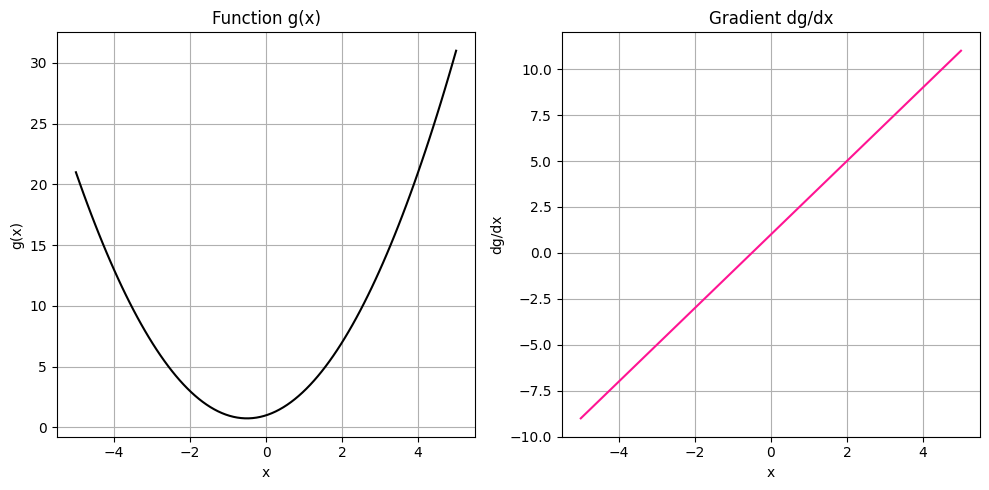

In [19]:
# Plot function and gradient
with torch.no_grad():
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].plot(x, g(x), color="black")
    ax[0].set_xlabel("x")
    ax[0].set_ylabel("g(x)")
    ax[0].set_title("Function g(x)")
    ax[0].grid()
    ax[1].plot(x, dgdx, color="deeppink")
    ax[1].set_xlabel("x")
    ax[1].set_ylabel("dg/dx")
    ax[1].set_title("Gradient dg/dx")
    ax[1].grid()
    plt.tight_layout()
    plt.show()

## Task 5: Gradients in 2D 
Given is a vectorfield $f: \mathcal{R}^2 \rightarrow \mathcal{R}$ defined as 

$$
f(\mathbf{x}) = (\mathbf{x} - \tilde{\mathbf{x}}) \cdot \mathbf{Q} \cdot (\mathbf{x} - \tilde{\mathbf{x}})
$$
with 
$$
\mathbf{Q} = 
\begin{pmatrix}
    2 & 1 \\
    1 & 1 
\end{pmatrix} 
\quad 
\text{and}
\quad
\tilde{\mathbf{x}} = 
\begin{pmatrix}
    -1\\
    1 
\end{pmatrix}
$$

a) Compute the gradient analytically.

> The function can be rewritten to 
> $$
>   f(x_1, x_2) = 2(x_1+1)^2 + 2(x_1+1)(x_2-1) + (x_2-1)^2.
> $$
> Then, we can compute 
> $$
>   \frac{\partial f}{\partial x_1} = 4 (x_1+1) + 2(x_2-1)
> $$
> and
> $$
>   \frac{\partial f}{\partial x_2} = 2(x_1+1) + 2(x_2-1)
> $$
> Finally, the gradient is 
> $$
> \nabla f = 
> \begin{pmatrix}
>   \frac{\partial f}{\partial x_1} \\
>   \frac{\partial f}{\partial x_2} \\
> \end{pmatrix}= 
> \begin{pmatrix}
>   4 x_1 + 2 x_2 + 2 \\
>   2x_1 + 2 x_2 \\
> \end{pmatrix}
> $$

Doing these computations by hand takes a while. Therefore we take a look at how to compute gradients using PyTorch. To do so, we start by defining $\mathbf{Q}$, $\tilde{\mathbf{x}}$ and the function $f(\mathbf{x})$. 

b) Implement the function $f(\mathbf{x})$.

In [20]:
xt = torch.tensor([-1.0, 1.0])
Q = torch.tensor([[2.0, 1.0], [1, 1.0]])


def f(x):
    dx = x - xt
    return dx @ Q @ dx

We would like to be able to evaluate the function for many values of $\mathbf{x}$ at the same time. This is equivalent to passing a tensor of the shape $\mathcal{R}^{... \times 2}$ with arbitrary dimensions except the last axis. 

c) Reimplement the function $f(x)$ employing an ellipsis `...` in `torch.einsum()`.

In [21]:
def f(x):
    dx = x - xt
    return torch.einsum("...i,ij,...j", dx, Q, dx)

If your function is defined correctly, the following cell should plot the function values as a contour plot.

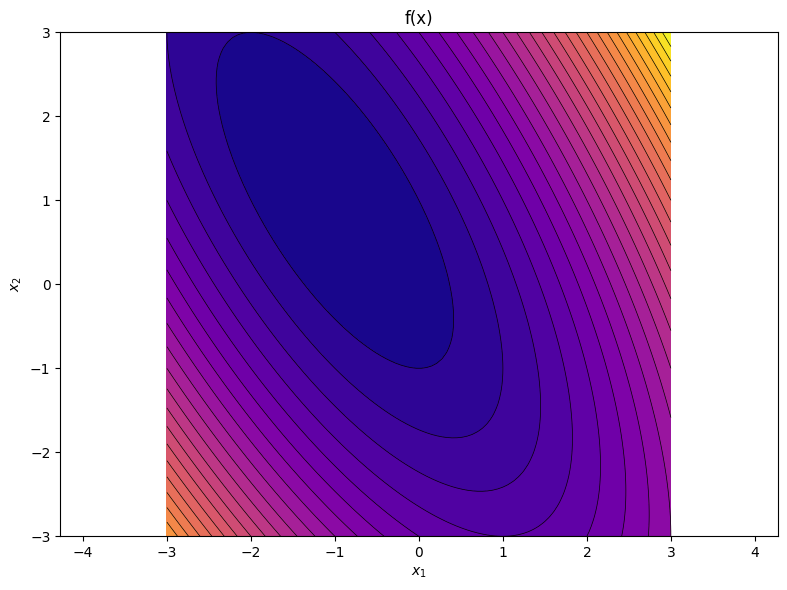

In [22]:
# Define x grid
x0 = torch.linspace(-3, 3, steps=100, requires_grad=True)
x1 = torch.linspace(-3, 3, steps=100, requires_grad=True)
x_grid = torch.stack(torch.meshgrid(x0, x1, indexing="xy"), dim=2)

plot_contours(x_grid, f(x_grid), title="f(x)")

Note that the `requires_grad=True` argument defines that these specific tensors will be used in gradient computations. They reserve storage for the tensor data as well as the gradients. Now, lets compute the actual gradients with automatic differentiation.

d) Check if the gradients are computed correctly by comparing the result with the analytical derivation and your visual understanding of the gradient. 

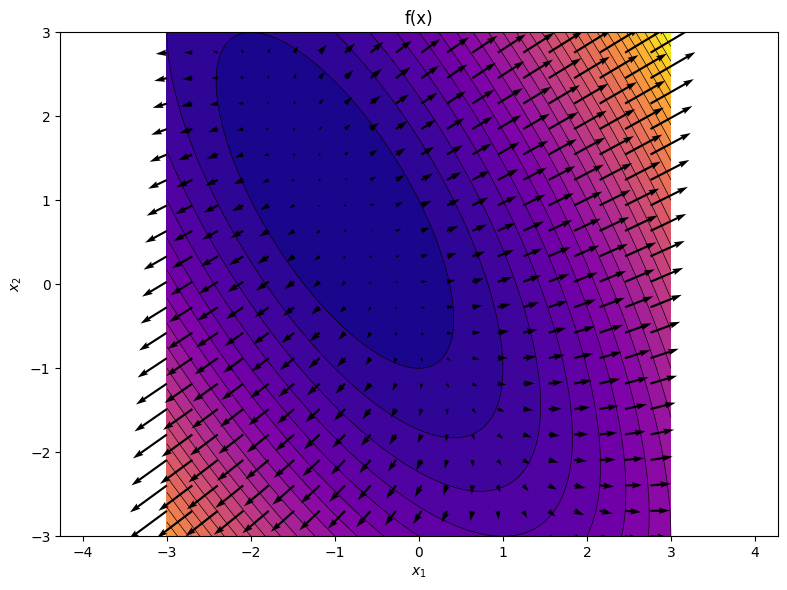

In [23]:
# Compute gradient
dfdx = torch.autograd.grad(f(x_grid).sum(), x_grid)[0]

# Reproduce basic plot
plot_contours(x_grid, f(x_grid), title="f(x)")

# Plot gradient vectors as arrows on top of previous plot
with torch.no_grad():
    stride = 5
    plt.quiver(
        x_grid[::stride, ::stride, 0],
        x_grid[::stride, ::stride, 1],
        dfdx[::stride, ::stride, 0],
        dfdx[::stride, ::stride, 1],
    )